## Step 1. Import all required library

In [28]:
# various classifiers/regressors models
from sklearn import svm, datasets
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

# various classifiers/regressors models
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.datasets import make_regression


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#make non numeric feature to numeric
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()
import numpy as np

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression, make_classification

path=".../Mouse_Survival/data/"
survivor_data=pd.read_csv(path+"all_measures_edit_survivor.csv")
nonsurvivor_data=pd.read_csv(path+"all_measures_non_survival.csv")
survivor_data_cortex=pd.read_csv(path+"Cortex_measurements_survivors.csv")
nonsurvivor_data_cortex=pd.read_csv(path+"Cortex_measurements_non_survivors.csv")

survivor_data_thick=pd.read_csv(path+"cortical_thick_surv.csv")
nonsurvivor_data_thick=pd.read_csv(path+"cortical_thick_non_surv.csv")
survivor_data_thick.head()

,ID,Average Thickness
0,1457_T2,87.206379
1,1465_T2,85.913696
2,1468_T2,83.330035
3,1469_T2,83.094998
4,1470_T2,80.674673


## Step 3. Merge data from all files

In [30]:
merge_survivor_data=survivor_data.merge(survivor_data_cortex, how="inner",left_on="ID", right_on='Volume Name')
merge_nonsurvivor_data=nonsurvivor_data.merge(nonsurvivor_data_cortex, how="inner",left_on="ID", right_on='Volume Name')

In [31]:
merge_survivor_data=merge_survivor_data.merge(survivor_data_thick, how="inner",left_on="ID", right_on='ID')
merge_nonsurvivor_data=merge_nonsurvivor_data.merge(nonsurvivor_data_thick, how="inner",left_on="ID", right_on='ID')

In [32]:
merge_survivor_data

,ID,Rest-of-Brain,External-Capsule,Hippocampus,Cerebellum,Brain-stem,Ventricles,Olfactory-bulb,Cortex,Hypothalamus,Thalamus,Caudate-Putamen,Total Brain Volume,Volume Name,Volumes,Major_axis,Minor_axis,Solidity,Average Thickness
0,1465_T2,100.26,20.20,29.08,67.90,43.03,14.00,45.60,137.04,7.03,37.89,20.82,427.41,1465_T2,137.044224,213.707554,104.215273,0.432616,85.913696
1,1468_T2,103.39,20.96,30.90,63.98,52.12,15.03,47.13,134.47,8.49,39.28,21.94,436.36,1468_T2,134.466048,212.602159,104.744236,0.428043,83.330035
2,1469_T2,93.20,20.99,31.21,63.99,47.42,13.30,42.70,131.95,6.03,34.92,19.80,406.54,1469_T2,131.951808,209.900687,100.818179,0.432121,83.094998
3,1470_T2,100.04,22.49,30.55,68.06,46.87,14.22,46.63,136.96,7.39,40.28,21.97,436.53,1470_T2,136.961280,207.261031,103.670013,0.444888,80.674673
4,1471_T2,97.94,21.66,30.58,69.86,49.54,15.30,41.07,136.77,7.06,37.21,19.94,429.41,1471_T2,136.766016,213.606342,100.944431,0.428097,88.812599
5,1473_T2,92.25,20.17,28.28,66.57,47.75,14.34,40.09,131.92,6.80,36.29,17.69,414.46,1473_T2,131.915520,211.445810,101.213068,0.418659,93.065631
6,1474_T2,93.50,20.30,28.16,65.95,46.18,14.01,44.50,129.90,6.21,35.62,18.06,414.25,1474_T2,129.904128,212.978335,105.905403,0.428356,83.290110
7,1477_T2,86.01,19.57,24.86,63.13,45.94,11.65,36.59,124.54,6.59,32.30,16.68,392.15,1477_T2,124.535232,205.526871,105.147133,0.443756,86.146471
8,1483_T2,104.69,20.68,31.24,65.66,51.53,13.85,39.16,128.74,7.83,41.14,19.29,415.02,1483_T2,128.737728,214.789748,105.142415,0.418427,76.768467
9,1485_T2,88.73,20.36,26.24,66.26,47.08,12.31,40.98,131.84,6.49,34.93,17.51,404.52,1485_T2,131.839488,210.373413,105.999050,0.449006,83.769558


In [33]:
#survivor_data_cortex['Major_axis']
training_data=pd.DataFrame([merge_survivor_data["Cortex"],merge_survivor_data['Major_axis'],merge_survivor_data['Minor_axis'],merge_survivor_data['Solidity'],merge_survivor_data['Average Thickness'],merge_survivor_data['Total Brain Volume'] ]).transpose()
training_data["Label"]=1

training_data2=pd.DataFrame([merge_nonsurvivor_data["Cortex"],merge_nonsurvivor_data['Major_axis'],merge_nonsurvivor_data['Minor_axis'],merge_nonsurvivor_data['Solidity'],merge_nonsurvivor_data['Average Thickness'],merge_nonsurvivor_data['Total Brain Volume'] ]).transpose()
training_data2["Label"]=0

training_data=training_data.append(training_data2, ignore_index=True)
labels=pd.DataFrame()
labels['Label']=training_data["Label"]
training_data.drop('Label', axis=1, inplace=True)
training_data.drop('Total Brain Volume', axis=1, inplace=True)
#training_data.columns = training_data.columns.str.replace('Cortex', 'Volume')


In [34]:
#training_data["Total Brain Volume"]=training_data["Total Brain Volume"]-training_data["Cortex"]
training_data.columns = training_data.columns.str.replace('Cortex', 'Volume')
training_data.columns = training_data.columns.str.replace('Average Thickness', 'Average_Thickness')
training_data.head()

,Volume,Major_axis,Minor_axis,Solidity,Average_Thickness
0,137.04,213.707554,104.215273,0.432616,85.913696
1,134.47,212.602159,104.744236,0.428043,83.330035
2,131.95,209.900687,100.818179,0.432121,83.094998
3,136.96,207.261031,103.670013,0.444888,80.674673
4,136.77,213.606342,100.944431,0.428097,88.812599


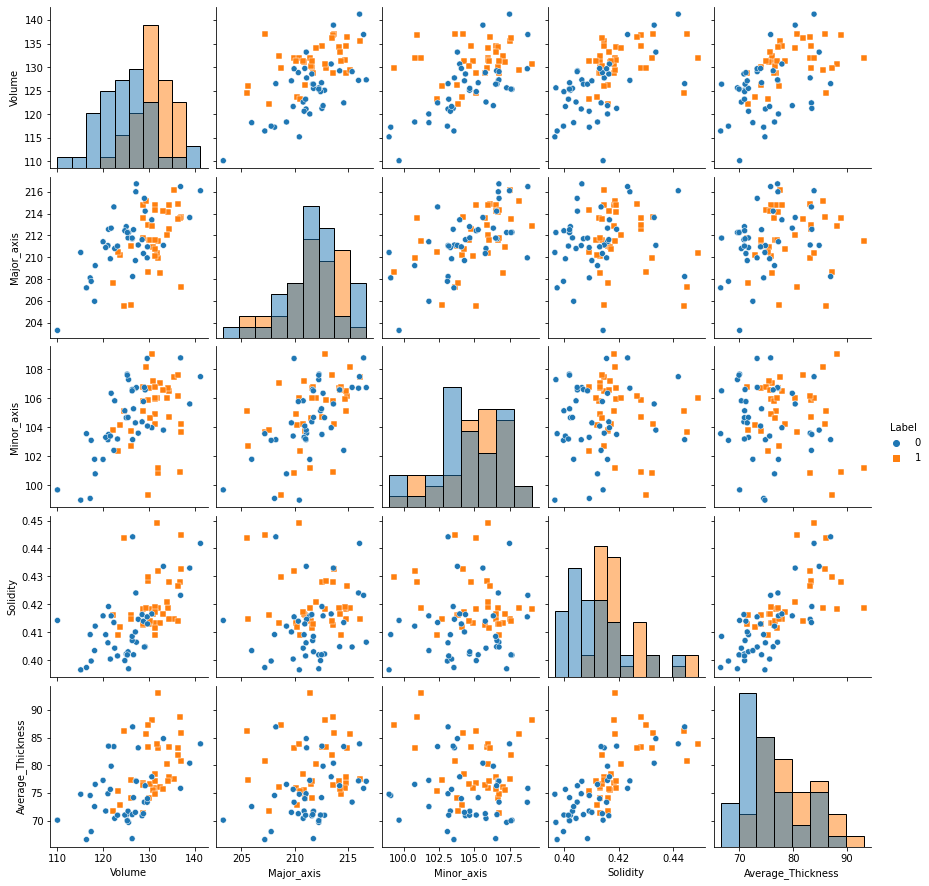

In [61]:
import seaborn as sns
sns.pairplot(training_data, hue="Label", markers=["o", "s"],diag_kind="hist")

## Step 4. Splitting Train and TEST data uniformly from two group

In [35]:
training_data=training_data.to_numpy()
labels=labels.to_numpy()
X_train,X_test,Y_train,Y_test=train_test_split(training_data[0:37,:],labels[0:37],test_size=0.2, random_state=1,shuffle=True)



In [36]:
X_train2,X_test2,Y_train2,Y_test2=train_test_split(training_data[37:,:],labels[37:],test_size=0.2, random_state=1,shuffle=True)
X_train=np.append(X_train,X_train2,axis=0)
X_test=np.append(X_test,X_test2,axis=0)
Y_train=np.append(Y_train,Y_train2,axis=0)
Y_test=np.append(Y_test,Y_test2,axis=0)

In [37]:
print(X_train.dtype)
scale = StandardScaler().fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)
print(np.mean(X_train,axis=0),np.std(X_train,axis=0))

float64
[ 8.40675435e-15  5.29630984e-16  5.38731173e-15 -8.35317698e-15
 -2.14764454e-15] [1. 1. 1. 1. 1.]


In [38]:

X_train=X_train/(X_train.max(axis=0))
X_test=X_test/(X_test.max(axis=0))

## Step 5: Modeling- SVM

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

parameters = {'kernel':('linear','rbf','poly'), 'C':[0.001,0.01,1, 10,100,1000,10000],"gamma":[0.001,0.01,1,1.00,10,100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 1, 1.0, 10, 100],
                         'kernel': ('linear', 'rbf', 'poly')})

In [193]:
print(clf.best_params_['C'],clf.best_params_['gamma'],clf.best_params_['kernel'])
model = svm.SVC(C=clf.best_params_['C'],kernel=clf.best_params_['kernel'],gamma=clf.best_params_['gamma'])
#model=svm.SVC(C=100,kernel='rbf',gamma=0.001)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,Y_test),f1_score(y_pred,Y_test))

1 0.001 linear
0.875 0.875


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


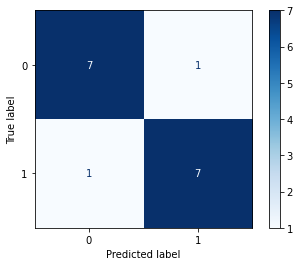

In [194]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, Y_test,cmap=plt.cm.Blues,)

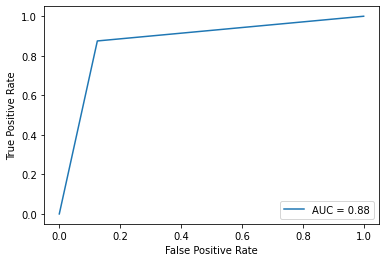

In [195]:
from sklearn import metrics
from sklearn.metrics import roc_curve,RocCurveDisplay,roc_auc_score,auc
fpr, tpr, _ = roc_curve(y_pred,Y_test)
roc_auc = metrics.auc(fpr, tpr)
#auc=roc_auc_score(y_pred,Y_test, average=None)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot()


## Logistic Regression

l2
0.875


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

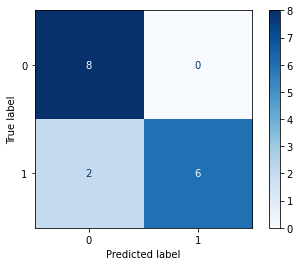

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

#parameters = {'penalty':['elasticnet',], 'solver':['saga',],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}#best l1=0.1
parameters = {'penalty':['l2',], 'solver':['liblinear',]}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters)
clf.fit(X_train, Y_train)
print(clf.best_params_['penalty'])

#logreg = LogisticRegression(penalty=clf.best_params_['penalty'],l1_ratio=clf.best_params_['l1_ratio'], solver='saga')
logreg = LogisticRegression(penalty=clf.best_params_['penalty'], solver='liblinear')
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
plot_confusion_matrix(logreg, X_test, Y_test,cmap=plt.cm.Blues,)
print(accuracy_score(y_pred,Y_test))


In [40]:
model = RandomForestClassifier(n_estimators=10, max_depth=4)
model.fit(X_train, Y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(Y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


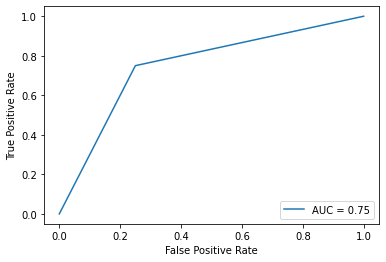

In [41]:
from sklearn.metrics import roc_curve,RocCurveDisplay,roc_auc_score,auc
fpr, tpr, _ = roc_curve(Y_test, yhat)
roc_auc = metrics.auc(fpr, tpr)
#auc=roc_auc_score(y_pred,Y_test, average=None)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot()

In [33]:
X_train=X_train/(X_train.max(axis=0))
X_test=X_test/(X_test.max(axis=0))


In [49]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import cv2
import tensorflow as tf 
tf.executing_eagerly()
tf.config.experimental_run_functions_eagerly(True)


from tensorflow.python.keras import backend as K
from tensorflow.python import debug as tf_debug
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split

import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, PReLU,BatchNormalization, Flatten, MaxPool2D, ReLU, Conv2DTranspose
from tensorflow.keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add, Dropout
from tqdm import tqdm
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import plot_model
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import save_img
import PIL
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.metrics import Precision

In [50]:
def build_model(input_dim,drop_rate):
    ip=Input(input_dim)
    nbase_filter=16
    mulfactor=4
    #Encoder Network
    layer_top1=Dense(nbase_filter)(ip)
    x1=Dense(nbase_filter)(layer_top1)
    x1=BatchNormalization()(x1)
    x1=PReLU()(x1)
    x1=Dropout(drop_rate)(x1)
    x1=add([x1,layer_top1])
    
    
    layer_top2=Dense(nbase_filter*mulfactor)(x1)
    x1=BatchNormalization()(layer_top2)
    x1=PReLU()(x1)
    x1=Dropout(drop_rate)(x1)
    x1=add([x1,layer_top2])
    
    layer_top3=Dense(nbase_filter*mulfactor*mulfactor)(x1)
    x1=BatchNormalization()(layer_top3)
    x1=PReLU()(x1)
    x1=Dropout(drop_rate)(x1)
    x1=add([x1,layer_top3])
    
    layer_top4=Dense(nbase_filter*mulfactor*mulfactor*mulfactor)(x1)
    x1=BatchNormalization()(layer_top4)
    x1=PReLU()(x1)
    x1=Dropout(drop_rate)(x1)
    x1=add([x1,layer_top4])
    
    
    #Decoder Network
    
    layer_top6=Dense(nbase_filter*mulfactor*mulfactor)(x1)
    x1=BatchNormalization()(layer_top6)
    x1=PReLU()(x1)
    x1=Dropout(drop_rate)(x1)
    x1=add([x1,layer_top6])
    
    layer_top7=Dense(nbase_filter*mulfactor)(x1)
    x1=BatchNormalization()(layer_top7)
    x1=PReLU()(x1)
    x1=Dropout(drop_rate)(x1)
    x1=add([x1,layer_top7])
    
    layer_top8=Dense(nbase_filter)(x1)
    x1=BatchNormalization()(layer_top8)
    x1=PReLU()(x1)
    x1=Dropout(drop_rate)(x1)
    x1=add([x1,layer_top8])
    
    x1=Dense(1, activation='sigmoid')(x1)
    model=Model(inputs=ip,outputs=x1)
    #model.compile(loss=f1_loss, optimizer= Adam(learning_rate=0.001),metrics=['accuracy'] )
    return model
    

In [51]:
model=build_model(5,0.2)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_54 (Dense)                (None, 16)           96          input_7[0][0]                    
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 16)           272         dense_54[0][0]                   
__________________________________________________________________________________________________
batch_normalization_42 (BatchNo (None, 16)           64          dense_55[0][0]                   
____________________________________________________________________________________________

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
model_name="../Mouse_Survival/models_weight/models_weight.h5"
def step_decay(epoch, initial_lrate, drop, epochs_drop):
    return initial_lrate * math.pow(drop, math.floor((1+epoch)/float(epochs_drop)))

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    return 1 - K.mean(f1)

def get_callbacks(model_file, learning_rate_drop=0.8,learning_rate_patience=7, verbosity=1):
    callbacks = list()
    callbacks.append(ModelCheckpoint(model_file, save_best_only=True))
    callbacks.append(ReduceLROnPlateau(factor=learning_rate_drop, patience=learning_rate_patience,verbose=verbosity))
    #callbacks.append(EarlyStopping(verbose=verbosity, patience=100))
    return callbacks
#model.compile(loss=f1_loss, optimizer= Adam(learning_rate=0.0001),metrics=['accuracy'] )
model.compile(loss=f1_loss, optimizer= SGD(learning_rate=0.01,momentum=0.9),metrics=['accuracy'] )
history=model.fit(X_train,Y_train,
                epochs=1500,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, Y_test),
                callbacks=get_callbacks(model_name,0.8,20,1)
                 )

model_json = model.to_json()
with open("../Mouse_Survival/models_weight/model_weights.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("../Mouse_Survival/models_weight/model_weights_json.h5")
print("Saved model to disk")

Epoch 1/1500
2/2 [==============================] - 0s 55ms/step - loss: 0.4915 - accuracy: 0.4918 - val_loss: 0.4555 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 2/1500
2/2 [==============================] - 0s 55ms/step - loss: 0.4467 - accuracy: 0.5246 - val_loss: 0.4444 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 3/1500
2/2 [==============================] - 0s 55ms/step - loss: 0.4666 - accuracy: 0.5246 - val_loss: 0.4106 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 4/1500
2/2 [==============================] - 0s 79ms/step - loss: 0.4013 - accuracy: 0.5738 - val_loss: 0.3684 - val_accuracy: 0.5625 - lr: 0.0100
Epoch 5/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.4106 - accuracy: 0.5574 - val_loss: 0.4006 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 6/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.2982 - accuracy: 0.6885 - val_loss: 0.4133 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 7/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.3

Epoch 53/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.2364 - accuracy: 0.7541 - val_loss: 0.2632 - val_accuracy: 0.6875 - lr: 0.0080
Epoch 54/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2237 - accuracy: 0.7869 - val_loss: 0.2607 - val_accuracy: 0.6875 - lr: 0.0080
Epoch 55/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1928 - accuracy: 0.8033 - val_loss: 0.2903 - val_accuracy: 0.6875 - lr: 0.0080
Epoch 56/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2012 - accuracy: 0.7869 - val_loss: 0.2009 - val_accuracy: 0.8125 - lr: 0.0080
Epoch 57/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.2561 - accuracy: 0.7377 - val_loss: 0.2000 - val_accuracy: 0.8125 - lr: 0.0080
Epoch 58/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.3006 - accuracy: 0.6885 - val_loss: 0.1994 - val_accuracy: 0.8125 - lr: 0.0080
Epoch 59/1500
2/2 [==============================] - 0s 108ms/step - l

Epoch 103/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.2642 - accuracy: 0.7377 - val_loss: 0.2500 - val_accuracy: 0.7500 - lr: 0.0041
Epoch 104/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.2312 - accuracy: 0.7541 - val_loss: 0.2500 - val_accuracy: 0.7500 - lr: 0.0041
Epoch 105/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2715 - accuracy: 0.7377 - val_loss: 0.2501 - val_accuracy: 0.7500 - lr: 0.0041
Epoch 106/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2080 - accuracy: 0.7869 - val_loss: 0.2556 - val_accuracy: 0.7500 - lr: 0.0041
Epoch 107/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1920 - accuracy: 0.8033 - val_loss: 0.2857 - val_accuracy: 0.6875 - lr: 0.0041
Epoch 108/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.2239 - accuracy: 0.7705 - val_loss: 0.2938 - val_accuracy: 0.6875 - lr: 0.0041
Epoch 109/1500
2/2 [==============================] - 0s 27ms/st

2/2 [==============================] - 0s 27ms/step - loss: 0.2077 - accuracy: 0.7705 - val_loss: 0.1765 - val_accuracy: 0.8125 - lr: 0.0013
Epoch 203/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.2002 - accuracy: 0.8197 - val_loss: 0.1765 - val_accuracy: 0.8125 - lr: 0.0013
Epoch 204/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1901 - accuracy: 0.8033 - val_loss: 0.1765 - val_accuracy: 0.8125 - lr: 0.0013
Epoch 205/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1804 - accuracy: 0.8033 - val_loss: 0.1765 - val_accuracy: 0.8125 - lr: 0.0013
Epoch 206/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.2161 - accuracy: 0.7869 - val_loss: 0.1765 - val_accuracy: 0.8125 - lr: 0.0013
Epoch 207/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1707 - accuracy: 0.8197 - val_loss: 0.1770 - val_accuracy: 0.8125 - lr: 0.0013
Epoch 208/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.16

1/2 [==============>...............] - ETA: 0s - loss: 0.2353 - accuracy: 0.7500
Epoch 00301: ReduceLROnPlateau reducing learning rate to 0.0004398046061396599.
2/2 [==============================] - 0s 28ms/step - loss: 0.1829 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 5.4976e-04
Epoch 302/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1668 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 4.3980e-04
Epoch 303/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1513 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 4.3980e-04
Epoch 304/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1835 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 4.3980e-04
Epoch 305/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2168 - accuracy: 0.7541 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 4.3980e-04
Epoch 306/1500
2/2 [==============================] - 

2/2 [==============================] - 0s 27ms/step - loss: 0.1993 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.8014e-04
Epoch 399/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1704 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.8014e-04
Epoch 400/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1652 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.8014e-04
Epoch 401/1500
1/2 [==============>...............] - ETA: 0s - loss: 0.2105 - accuracy: 0.7500
Epoch 00401: ReduceLROnPlateau reducing learning rate to 0.00014411518350243568.
2/2 [==============================] - 0s 27ms/step - loss: 0.2055 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.8014e-04
Epoch 402/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1555 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.4412e-04
Epoch 403/1500
2/2 [==============================] -

2/2 [==============================] - 0s 27ms/step - loss: 0.1553 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 5.9030e-05
Epoch 496/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1686 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 5.9030e-05
Epoch 497/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1564 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 5.9030e-05
Epoch 498/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.1638 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 5.9030e-05
Epoch 499/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.1634 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 5.9030e-05
Epoch 500/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.1693 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 5.9030e-05
Epoch 501/1500
1/2 [==============>...............] - E

2/2 [==============================] - 0s 28ms/step - loss: 0.1978 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.9343e-05
Epoch 593/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1700 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.9343e-05
Epoch 594/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1800 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.9343e-05
Epoch 595/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1974 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.9343e-05
Epoch 596/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1658 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.9343e-05
Epoch 597/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1553 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.9343e-05
Epoch 598/1500
2/2 [==============================] - 0

2/2 [==============================] - 0s 29ms/step - loss: 0.1672 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.3383e-06
Epoch 690/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.2665 - accuracy: 0.7213 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.3383e-06
Epoch 691/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1817 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.3383e-06
Epoch 692/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.2093 - accuracy: 0.7705 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.3383e-06
Epoch 693/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.2179 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.3383e-06
Epoch 694/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1614 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.3383e-06
Epoch 695/1500
2/2 [==============================] - 0

2/2 [==============================] - 0s 29ms/step - loss: 0.1700 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.0769e-06
Epoch 787/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2022 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.0769e-06
Epoch 788/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1896 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.0769e-06
Epoch 789/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.1869 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.0769e-06
Epoch 790/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1687 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.0769e-06
Epoch 791/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.1648 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.0769e-06
Epoch 792/1500
2/2 [==============================] - 0

2/2 [==============================] - 0s 28ms/step - loss: 0.1974 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.8056e-07
Epoch 884/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.2162 - accuracy: 0.7705 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.8056e-07
Epoch 885/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1885 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.8056e-07
Epoch 886/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1563 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.8056e-07
Epoch 887/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.1707 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.8056e-07
Epoch 888/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1509 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.8056e-07
Epoch 889/1500
2/2 [==============================] - 0

1/2 [==============>...............] - ETA: 0s - loss: 0.1875 - accuracy: 0.8125
Epoch 00981: ReduceLROnPlateau reducing learning rate to 2.2300748696579832e-07.
2/2 [==============================] - 0s 28ms/step - loss: 0.1776 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.7876e-07
Epoch 982/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1715 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.2301e-07
Epoch 983/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1879 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.2301e-07
Epoch 984/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1726 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.2301e-07
Epoch 985/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1968 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.2301e-07
Epoch 986/1500
2/2 [==============================] -

2/2 [==============================] - 0s 29ms/step - loss: 0.1680 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.4272e-07
Epoch 1030/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1709 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.4272e-07
Epoch 1031/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1534 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.4272e-07
Epoch 1032/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2058 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.4272e-07
Epoch 1033/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1390 - accuracy: 0.8525 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.4272e-07
Epoch 1034/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1684 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.4272e-07
Epoch 1035/1500
2/2 [=============================

Epoch 1078/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2005 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 9.1344e-08
Epoch 1079/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1895 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 9.1344e-08
Epoch 1080/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.2226 - accuracy: 0.7541 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 9.1344e-08
Epoch 1081/1500
1/2 [==============>...............] - ETA: 0s - loss: 0.1181 - accuracy: 0.8750
Epoch 01081: ReduceLROnPlateau reducing learning rate to 7.307509690690496e-08.
2/2 [==============================] - 0s 29ms/step - loss: 0.1723 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 9.1344e-08
Epoch 1082/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.2027 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 7.3075e-08
Epoch 1083/1500
2/2 [=============

Epoch 1126/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.1728 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 4.6768e-08
Epoch 1127/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.1831 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 4.6768e-08
Epoch 1128/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.1872 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 4.6768e-08
Epoch 1129/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.1496 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 4.6768e-08
Epoch 1130/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.2148 - accuracy: 0.7705 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 4.6768e-08
Epoch 1131/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1835 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 4.6768e-08
Epoch 1132/1500
2/2 [=============

Epoch 1175/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1684 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.9932e-08
Epoch 1176/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.2065 - accuracy: 0.7705 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.9932e-08
Epoch 1177/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1803 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.9932e-08
Epoch 1178/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1599 - accuracy: 0.8525 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.9932e-08
Epoch 1179/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1734 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.9932e-08
Epoch 1180/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1597 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.9932e-08
Epoch 1181/1500
1/2 [=============

Epoch 1223/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1873 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.5325e-08
Epoch 1224/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.1902 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.5325e-08
Epoch 1225/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1569 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.5325e-08
Epoch 1226/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1760 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.5325e-08
Epoch 1227/1500
2/2 [==============================] - 0s 30ms/step - loss: 0.1765 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.5325e-08
Epoch 1228/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1758 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.5325e-08
Epoch 1229/1500
2/2 [=============

Epoch 1272/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1945 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 9.8080e-09
Epoch 1273/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1546 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 9.8080e-09
Epoch 1274/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1905 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 9.8080e-09
Epoch 1275/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1446 - accuracy: 0.8525 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 9.8080e-09
Epoch 1276/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1835 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 9.8080e-09
Epoch 1277/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1520 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 9.8080e-09
Epoch 1278/1500
2/2 [=============

Epoch 1321/1500
1/2 [==============>...............] - ETA: 0s - loss: 0.1098 - accuracy: 0.8750
Epoch 01321: ReduceLROnPlateau reducing learning rate to 5.021682980554943e-09.
2/2 [==============================] - 0s 29ms/step - loss: 0.1844 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 6.2771e-09
Epoch 1322/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1701 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 5.0217e-09
Epoch 1323/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1906 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 5.0217e-09
Epoch 1324/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1820 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 5.0217e-09
Epoch 1325/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2075 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 5.0217e-09
Epoch 1326/1500
2/2 [=============

Epoch 1369/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1684 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 3.2139e-09
Epoch 1370/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1738 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 3.2139e-09
Epoch 1371/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1873 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 3.2139e-09
Epoch 1372/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2168 - accuracy: 0.7705 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 3.2139e-09
Epoch 1373/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2000 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 3.2139e-09
Epoch 1374/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1880 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 3.2139e-09
Epoch 1375/1500
2/2 [=============

Epoch 1418/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1683 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.0569e-09
Epoch 1419/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.1914 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.0569e-09
Epoch 1420/1500
2/2 [==============================] - 0s 28ms/step - loss: 0.2040 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.0569e-09
Epoch 1421/1500
1/2 [==============>...............] - ETA: 0s - loss: 0.1044 - accuracy: 0.8750
Epoch 01421: ReduceLROnPlateau reducing learning rate to 1.6455050655395098e-09.
2/2 [==============================] - 0s 27ms/step - loss: 0.1876 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 2.0569e-09
Epoch 1422/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.2095 - accuracy: 0.7869 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.6455e-09
Epoch 1423/1500
2/2 [============

Epoch 1466/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1944 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.0531e-09
Epoch 1467/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1768 - accuracy: 0.8033 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.0531e-09
Epoch 1468/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1606 - accuracy: 0.8361 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.0531e-09
Epoch 1469/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1778 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.0531e-09
Epoch 1470/1500
2/2 [==============================] - 0s 29ms/step - loss: 0.1387 - accuracy: 0.8525 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.0531e-09
Epoch 1471/1500
2/2 [==============================] - 0s 27ms/step - loss: 0.1700 - accuracy: 0.8197 - val_loss: 0.2941 - val_accuracy: 0.6875 - lr: 1.0531e-09
Epoch 1472/1500
2/2 [=============

In [52]:
model.load_weights("../Mouse_Survival/models_weight/model_weights.h5")

In [54]:

y_pred=model.predict(X_test)
y_pred[y_pred>=0.5] =1
y_pred[y_pred<0.5] =0
#print(y_pred)
print(accuracy_score(y_pred,Y_test))

#1.0,1,0.54,1.0

0.9375


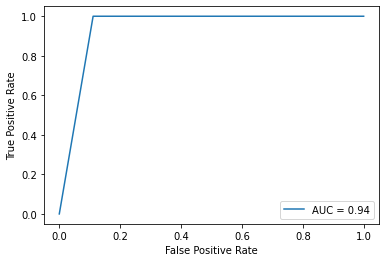

In [56]:
from sklearn import metrics
from sklearn.metrics import roc_curve,RocCurveDisplay,roc_auc_score,auc
fpr, tpr, _ = roc_curve(y_pred,Y_test)
roc_auc = metrics.auc(fpr, tpr)
#auc=roc_auc_score(y_pred,Y_test, average=None)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot()